In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns',200) 


In [80]:
df = pd.read_csv("../input/rollercoaster-database/coaster_db.csv")


In [81]:
df.shape

(1087, 56)

In [82]:
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [83]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [84]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [85]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [86]:
df.drop(['coaster_name', 'Length'],axis=1)

,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,...,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,...,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,112 ft (34 m),0.0,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN


In [87]:
df = df[['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model']].copy()

In [88]:
df = df[['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model']].copy()

In [89]:
df.shape

(1087, 10)

In [90]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model'],
      dtype='object')

In [91]:
df.dtypes

coaster_name          object
Length                object
Speed                 object
Location              object
Status                object
Opening date          object
Type                  object
Manufacturer          object
Height restriction    object
Model                 object
dtype: object

In [92]:
df = df.rename(columns = {
    'coaster_name':'Coaster Name',  
    'Opening date':'Opening Date',
    'Height restriction': "High Restriction", 
})


In [93]:
df.head()

,Coaster Name,Length,Speed,Location,Status,Opening Date,Type,Manufacturer,High Restriction,Model
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN


In [94]:
df.isna().sum()

Coaster Name          0
Length              134
Speed               150
Location              0
Status              213
Opening Date        250
Type                  0
Manufacturer         59
High Restriction    256
Model               343
dtype: int64

In [95]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [96]:
df.loc[df.duplicated()]

,Coaster Name,Length,Speed,Location,Status,Opening Date,Type,Manufacturer,High Restriction,Model
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,NaN,NaN
60,Derby Racer,NaN,NaN,Revere Beach,Removed,1911,Wood – Racing,Fred W. Pearce,NaN,NaN
61,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",50 mph (80 km/h),Conneaut Lake Park,Closed,"May 23, 1938",Wood,NaN,NaN,Out and Back roller coaster
167,Big Thunder Mountain Railroad,NaN,35 mph (56 km/h),Other,NaN,NaN,Steel – Mine Train,Arrow Development (California and Florida)Dyna...,40 in (102 cm),Mine Train
237,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",64 km/h (40 mph),Canada's Wonderland,Operating,"May 23, 1981 as Blauer Enzian, 1986 as Thunder...",Steel – Powered – Mine Train,Mack Rides,102 cm (3 ft 4 in),NaN
...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,262.5 ft (80.0 m),NaN,Six Flags Great Adventure,Operating,1999 as Road Runner Railway; 2021 as Lil' Devi...,Steel – Kiddie,Zamperla,NaN,Family Gravity Coaster 80STD
1064,Little Dipper (Conneaut Lake Park),NaN,NaN,Conneaut Lake Park,Operating,1950s,Steel,Allan Herschell Company,NaN,Little Dipper
1080,Iron Gwazi,"4,075 ft (1,242 m)",76 mph (122 km/h),Busch Gardens Tampa Bay,Under construction,NaN,Steel – Wooden,Rocky Mountain Construction,48[1] in (122 cm),I-Box Track
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN


In [97]:
df.loc[df.duplicated(subset=['Coaster Name'])].head(5)

,Coaster Name,Length,Speed,Location,Status,Opening Date,Type,Manufacturer,High Restriction,Model
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,NaN,NaN
60,Derby Racer,NaN,NaN,Revere Beach,Removed,1911,Wood – Racing,Fred W. Pearce,NaN,NaN
61,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",50 mph (80 km/h),Conneaut Lake Park,Closed,"May 23, 1938",Wood,NaN,NaN,Out and Back roller coaster
167,Big Thunder Mountain Railroad,NaN,35 mph (56 km/h),Other,NaN,NaN,Steel – Mine Train,Arrow Development (California and Florida)Dyna...,40 in (102 cm),Mine Train
237,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",64 km/h (40 mph),Canada's Wonderland,Operating,"May 23, 1981 as Blauer Enzian, 1986 as Thunder...",Steel – Powered – Mine Train,Mack Rides,102 cm (3 ft 4 in),NaN


In [98]:
df.query('Status == "Removed"')

,Coaster Name,Length,Speed,Location,Status,Opening Date,Type,Manufacturer,High Restriction,Model
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
734,Knightmare (Camelot),NaN,40 mph (64 km/h),Other,Removed,NaN,Other,Zierer,130 cm (4 ft 3 in),NaN
808,Dragon Challenge,"3,200 ft (975.4 m)",60 mph (96.6 km/h),Other,Removed,"May 28, 1999",Steel – Inverted – Dueling,Bolliger & Mabillard,54 in (137 cm),Inverted Coaster
833,BuzzSaw (roller coaster),150 m (490 ft),105 km/h (65 mph),Dreamworld,Removed,17 September 2011,Steel,Maurer AG,130 cm (4 ft 3 in),"SkyLoop, X-Coaster"
914,Dragon Wagon (Indiana Beach),NaN,NaN,Indiana Beach,Removed,August 2014,Steel,Wisdom Rides,NaN,NaN


In [99]:
df.loc[~df.duplicated(subset=['Length','Speed','Status','Model'])] \
.reset_index(drop=True).copy()

,Coaster Name,Length,Speed,Location,Status,Opening Date,Type,Manufacturer,High Restriction,Model
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN
3,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN
4,Backety-Back Scenic Railway,NaN,10 mph (16 km/h),Crystal Beach,Removed,1909,Wood – Shuttle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
831,Ice Breaker (roller coaster),"1,900 ft (580 m)",52 mph (84 km/h),SeaWorld Orlando,Under construction,February 2022,Steel – Launched,Premier Rides,NaN,Sky Rocket
832,Leviathan (Sea World),"1,000.0 m (3,280.8 ft)",80.0 km/h (49.7 mph),Sea World,Under construction,Easter 2022,Wood,Martin & Vleminckx,NaN,NaN
833,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster
834,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin


In [100]:
~df.duplicated(subset=['Length','Speed','Status','Model'])

0        True
1        True
2        True
3       False
4       False
        ...  
1082    False
1083     True
1084    False
1085     True
1086     True
Length: 1087, dtype: bool

In [101]:
df.shape

(1087, 10)

In [102]:
df

,Coaster Name,Length,Speed,Location,Status,Opening Date,Type,Manufacturer,High Restriction,Model
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin


In [103]:
df['Opening Date'].value_counts()

1972              7
1998              7
1976              7
1999              7
2022              6
                 ..
March 22, 1997    1
May 26, 1996      1
April 27, 1996    1
June 3, 1996      1
Easter 2022       1
Name: Opening Date, Length: 656, dtype: int64

In [104]:
new_df = df.dropna()

print(new_df.to_string())

                                                   Coaster Name                    Length                   Speed                                 Location                                                        Status                                                             Opening Date                                  Type                           Manufacturer                                        High Restriction                                               Model
13                                  Racer (1910 roller coaster)        4,500 ft (1,400 m)        40 mph (64 km/h)                                Kennywood                                                     Operating                                                                     1927                         Wood – Racing                           Charlie Mach                                          46 in (117 cm)                                              Racing
26                        Big Dipper (Blackpool Pl

In [105]:
df.dropna(inplace = True)

print(df.to_string())

                                                   Coaster Name                    Length                   Speed                                 Location                                                        Status                                                             Opening Date                                  Type                           Manufacturer                                        High Restriction                                               Model
13                                  Racer (1910 roller coaster)        4,500 ft (1,400 m)        40 mph (64 km/h)                                Kennywood                                                     Operating                                                                     1927                         Wood – Racing                           Charlie Mach                                          46 in (117 cm)                                              Racing
26                        Big Dipper (Blackpool Pl

In [106]:
df["Length"].fillna(130, inplace = True)

In [107]:
df

,Coaster Name,Length,Speed,Location,Status,Opening Date,Type,Manufacturer,High Restriction,Model
13,Racer (1910 roller coaster),"4,500 ft (1,400 m)",40 mph (64 km/h),Kennywood,Operating,1927,Wood – Racing,Charlie Mach,46 in (117 cm),Racing
26,Big Dipper (Blackpool Pleasure Beach),"3,300 ft (1,000 m)",40 mph (64 km/h),Blackpool Pleasure Beach,Operating,23 August 1923,Wood – Out and back,William Strickler,46 in (117 cm),Wooden Out and back coaster
35,Giant Dipper (Belmont Park),"2,600 ft (790 m)",48 mph (77 km/h),Other,Operating,"July 4, 1925",Wood,"Frank Prior, Fredrick Church",50 in (127 cm),Twister
46,Racer (Kennywood),"4,500 ft (1,400 m)",40 mph (64 km/h),Kennywood,Operating,1927,Wood – Racing,Charlie Mach,46 in (117 cm),Racing
80,Matterhorn Bobsleds,"2,037 ft (620.9 m)",27 mph (43.5 km/h),Other,Operating,"June 14, 1959",Steel,Arrow Development,42 in (107 cm),Special Coaster Systems
...,...,...,...,...,...,...,...,...,...,...
1070,The Ride to Happiness,"3,018.4 ft (920.0 m)",55.9 mph (90.0 km/h),Plopsaland De Panne,Operating,"July 1, 2021",Steel – Spinning,Mack Rides,130 cm (4 ft 3 in),Xtreme Spinning Coaster
1071,VelociCoaster,"4,700 ft (1,400 m)",70 mph (110 km/h),Universal's Islands of Adventure,Operating,"June 10, 2021[1]",Steel – Launched,Intamin,51 in (130 cm),Blitz Coaster
1073,ArieForce One,"3,400 ft (1,000 m)",64 mph (103 km/h),Fun Spot America Atlanta,Under construction,2022,Steel,Rocky Mountain Construction,48 in (122 cm),I-Box
1075,Dr. Diabolical’s Cliffhanger,"2,501 ft (762 m)",60 mph (97 km/h),Six Flags Fiesta Texas,Under construction,2022,Steel,Bolliger & Mabillard,52[1] in (132 cm),Dive Coaster


Text(0, 0.5, 'Count')

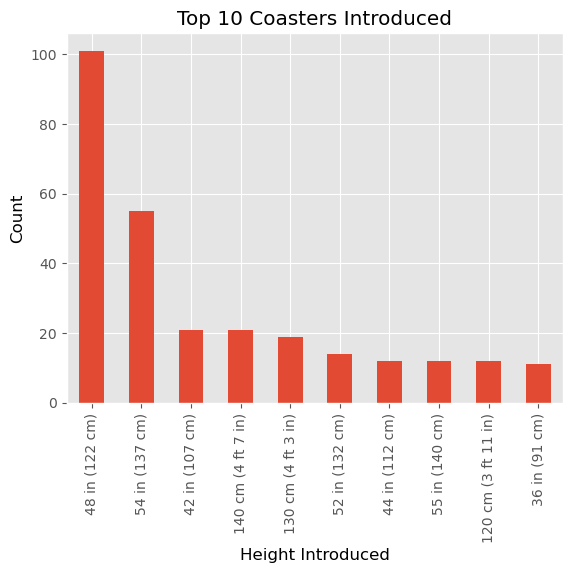

In [108]:
ax = df['High Restriction'].value_counts() \
.head(10) \
.plot(kind='bar', title="Top 10 Coasters Introduced")
ax.set_xlabel('Height Introduced', color='black')
ax.set_ylabel('Count', color='black')

In [109]:
# zx = df[fcvmvk[;,;;,/m 

In [110]:
df.shape

(434, 10)

In [111]:
# ax = df['High Restriction'].plot(kind='kde', title='Coaster Speed (mph)')
# # ax.set_xlabel('Height (cm))')

Text(0, 0.5, 'Count')

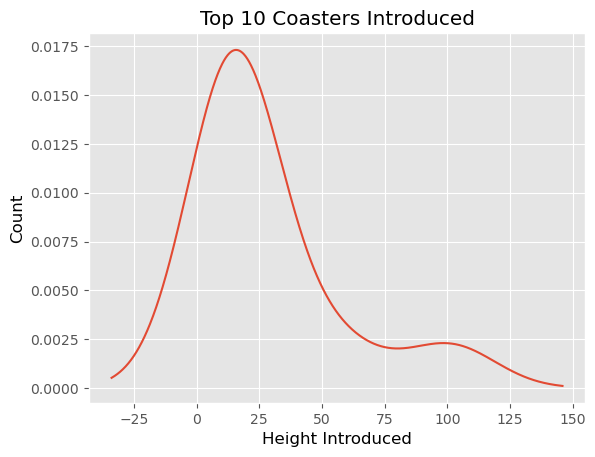

In [112]:
ax = df['High Restriction'].value_counts() \
.head(10) \
.plot(kind='kde', title="Top 10 Coasters Introduced")
ax.set_xlabel('Height Introduced', color='black')
ax.set_ylabel('Count', color='black')